Visualización de Datos
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/Python-for-descriptive-analytics/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/Python-for-descriptive-analytics/tree/master/) para explorar el repositorio usando `nbviewer`. 

---

# Matplotlib

Existen varios recursos externos para el aprendizaje de matpotlib. Algunos son listados [aquí](http://matplotlib.org/resources/index.html).

[Aquí](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) hay un tutorial escrito en Jupyter sobre matplotlib que ilustra como resolver muchos problemas comunes en la elaboración de gráficos. 

Del libro [Python Data Science cookbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)

A continuación hay varios ejemplos autoexplicativos que tienen como fin ilustrar rápidamente las capacidades básicas de matplotlib. 

Para manejar la librería, usualmente se define el tipo de gráfico que se necesita y se buscan ejemplos con características similares en la [galería](http://matplotlib.org/gallery.html). 

---

La ventaja de herramientas comerciales como Tableau, es la calidad y facilidad para realizar gráficos explicativos. El siguiente gráfico contiene la suma de la población por región y edad, y fue construido usando Tableau usando los datos del archivo `files/indicadores-mundiales.csv`. 

![alt text](images/suma-pob-region-edades-1.png)

A continuación se construye una versión de este mismo gráfico usando Python y `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

In [2]:
## Se lee el archivo
df = pd.read_csv('files/indicadores-mundiales-2.csv',
                    sep=',', encoding='latin-1')

In [3]:
## Nombres de las columnas
df.columns

Index(['Ano', 'Dias para iniciar un negocio', 'Emisiones de CO2',
       'Esperanza de vida (mujeres)', 'Esperanza de vida (varones)',
       'Facilidad para hacer negocios', 'Gasto en salud ( del PIB)',
       'Gasto en salud (per capita)', 'Horas preparar los impuestos',
       'Interes de prestamos', 'PIB', 'Pais', 'Poblacion 0-14',
       'Poblacion 15-64', 'Poblacion 65+', 'Poblacion total',
       'Poblacion urbana', 'Region', 'Tasa de mortalidad infantil',
       'Tasa de natalidad', 'Tasa tributaria empresarial', 'Turismo emisor',
       'Turismo receptivo', 'Uso de Internet', 'Uso de energia',
       'Uso de telefonos celulares'],
      dtype='object')

In [45]:
## Computa la suma del porcentaje de la población por región
data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]/100
data

,Poblacion 0-14,Poblacion 15-64,Poblacion 65+
Region,,,
Asia,53.186,106.687,10.130
Europa,37.802,138.306,28.905
Las Americas,53.755,109.018,12.231
Oceania,17.848,31.331,2.825
Oriente Medio,17.547,32.511,1.942
africa,111.362,144.527,9.117


`matplotlib` contiene varios tipos de gráficos, entre los que se incluyen:
* `plot(x, y)`
* `bar(x, y)`
* `barh(x, y)`
* `hist(x, bins)`
* `boxplot(x)`
* `triplot(triangles)`
* `scatter(x, y)`

## Ejemplo usando directamente `matplotlib`

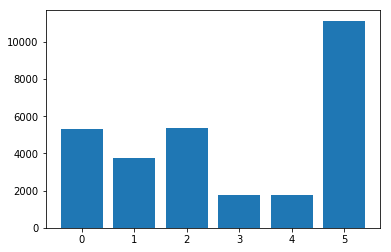

In [5]:
plt.bar(range(6), data['Poblacion 0-14']);

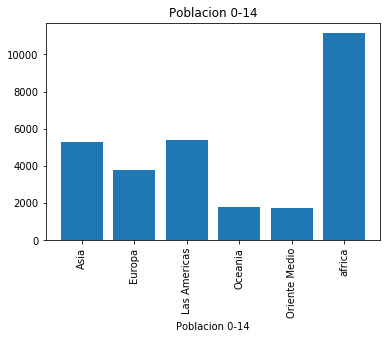

In [7]:
plt.bar(range(6), data['Poblacion 0-14'])
plt.xticks(range(6), list(data.index), rotation='vertical')
plt.title('Poblacion 0-14');
plt.xlabel('Poblacion 0-14');


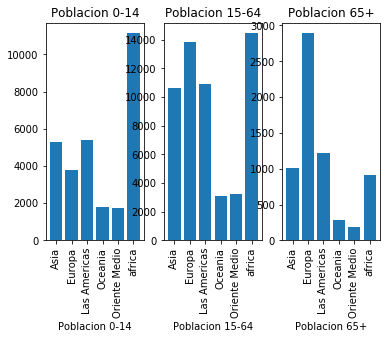

In [8]:
for index, colname in enumerate(data.columns):
    plt.subplot(1, 3, index+1)
    plt.bar(range(6), data[colname])
    plt.xticks(range(6), list(data.index), rotation='vertical')
    plt.title(colname)
    plt.xlabel(colname);

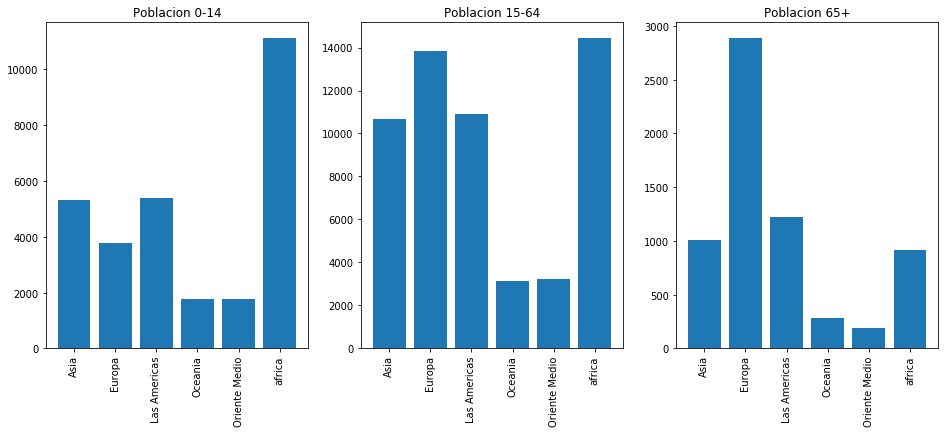

In [9]:
plt.figure(figsize=(16, 6))
for index, colname in enumerate(data.columns):
    plt.subplot(1, 3, index+1)
    plt.bar(range(6), data[colname])
    plt.xticks(range(6), list(data.index), rotation='vertical')
    plt.title(colname);

La principal crítica a la gráfica anterior es que la alienación se realizar por el eje Y que tiene distintas unidades para cada grafo. Resulta mejor hacer coincidir el continente con el eje Y. **¿Es más fácil la comparación en el gráfo de abajo?**

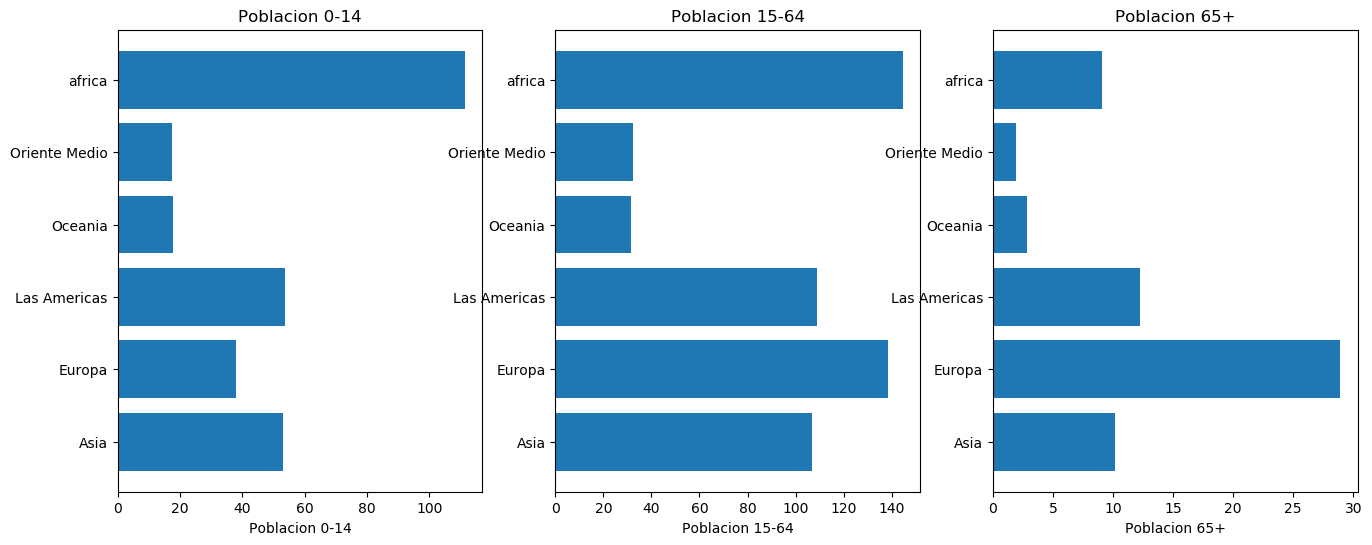

In [47]:
plt.figure(figsize=(16, 6))
for index, colname in enumerate(data.columns):
    plt.subplot(1, 3, index+1)
    plt.barh(range(6), data[colname])
    plt.yticks(range(6), list(data.index), rotation='horizontal')
    plt.title(colname)
    plt.xlabel(colname);

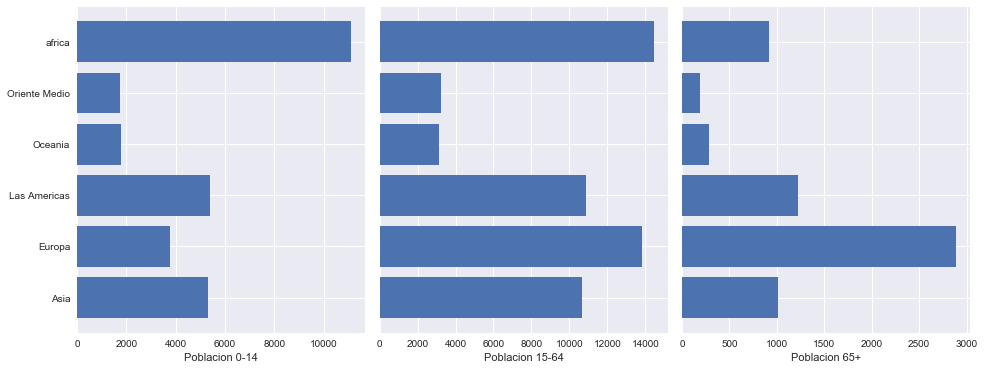

In [11]:
plt.style.use('seaborn')
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16, 6));
plt.subplots_adjust(wspace = 0.05, hspace=0.1)
for index, colname in enumerate(data.columns):
    axs[index].barh(list(data.index), data[colname])
    axs[index].set_xlabel(colname)

Para cambiar los estilos de colores: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html 

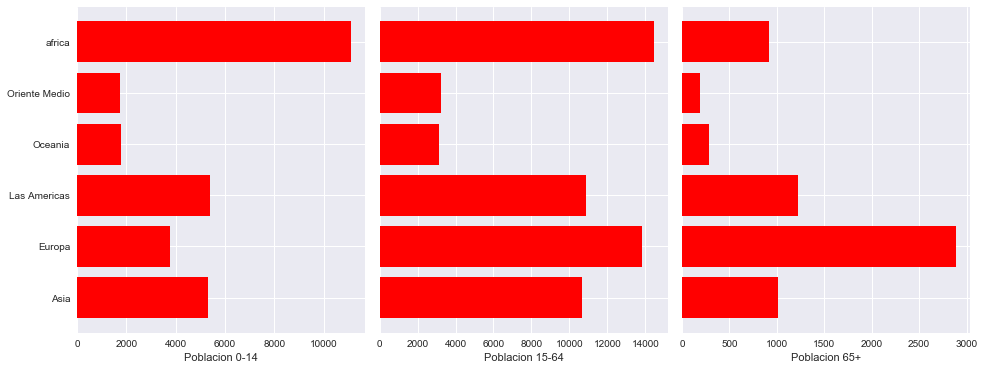

In [12]:
plt.style.use('seaborn')
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16, 6));
plt.subplots_adjust(wspace = 0.05, hspace=0.1)
for index, colname in enumerate(data.columns):
    axs[index].barh(list(data.index), data[colname], color='red')
    axs[index].set_xlabel(colname)

## Ejemplo usando pandas

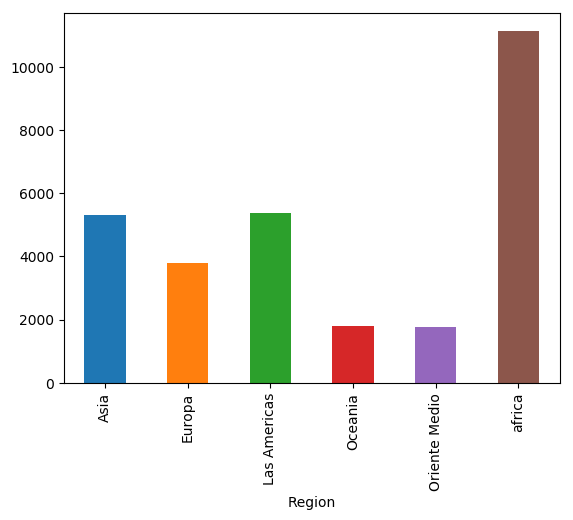

In [198]:
data['Poblacion 0-14'].plot.bar();

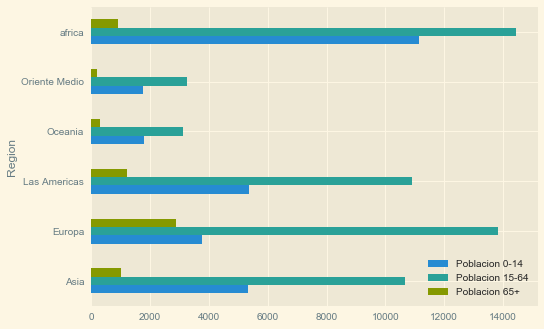

In [14]:
plt.style.use('Solarize_Light2')
data.plot.barh();

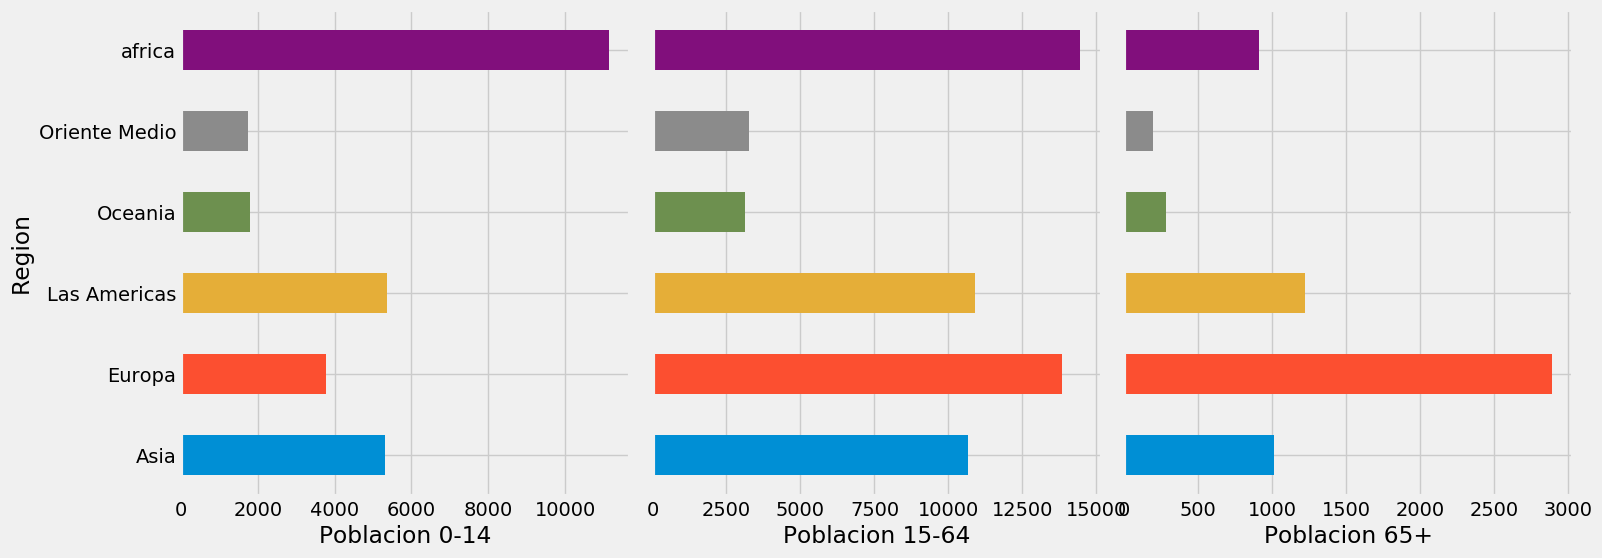

In [205]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16, 6));
plt.subplots_adjust(wspace = 0.05, hspace=0.1)
for index, colname in enumerate(data.columns):
    data[colname].plot.barh(ax=axs[index])
    axs[index].set_xlabel(colname)

# Problema 1

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

<img src="images/suma-pob-region-edades-2.png" width=700>

In [160]:
#data = df.groupby('Region').sum()[['Poblacion 0-14', 'Poblacion 15-64', 'Poblacion 65+']]
#plt.style.use('default')
#plt.barh(data(colname),valor)

TypeError: 'DataFrame' object is not callable

# Problema 2

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

<img src="images/suma-pob-region-edades-3.png" width=600>

In [226]:
dataV= data.transpose()
dataV

Region,Asia,Europa,Las Americas,Oceania,Oriente Medio,africa
Poblacion 0-14,5318.6,3780.2,5375.5,1784.8,1754.7,11136.2
Poblacion 15-64,10668.7,13830.6,10901.8,3133.1,3251.1,14452.7
Poblacion 65+,1013.0,2890.5,1223.1,282.5,194.2,911.7


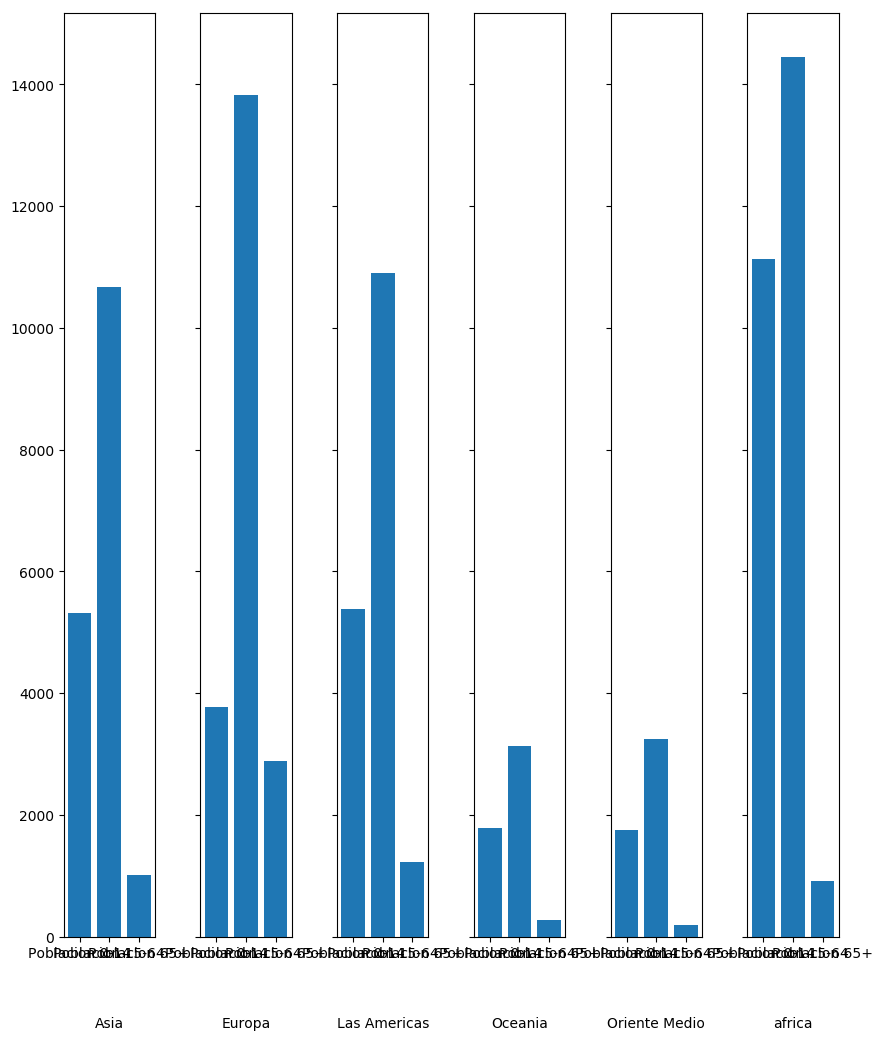

In [231]:
plt.style.use('default')
fig, axs = plt.subplots(1, 6,  sharex='col', sharey='row', figsize=(10, 12));
plt.subplots_adjust(wspace = 0.5, hspace=0)
for index, colname in enumerate(dataV):
    axs[index].bar(list(dataV.index), dataV[colname])
    axs[index].set_xlabel(colname, rotation= 0, labelpad= 40)

# Problema 3
Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Se grafica la suma del porcetaje de la población por regiones.

<img src="images/suma-pob-region-edades-4.png" width=400>

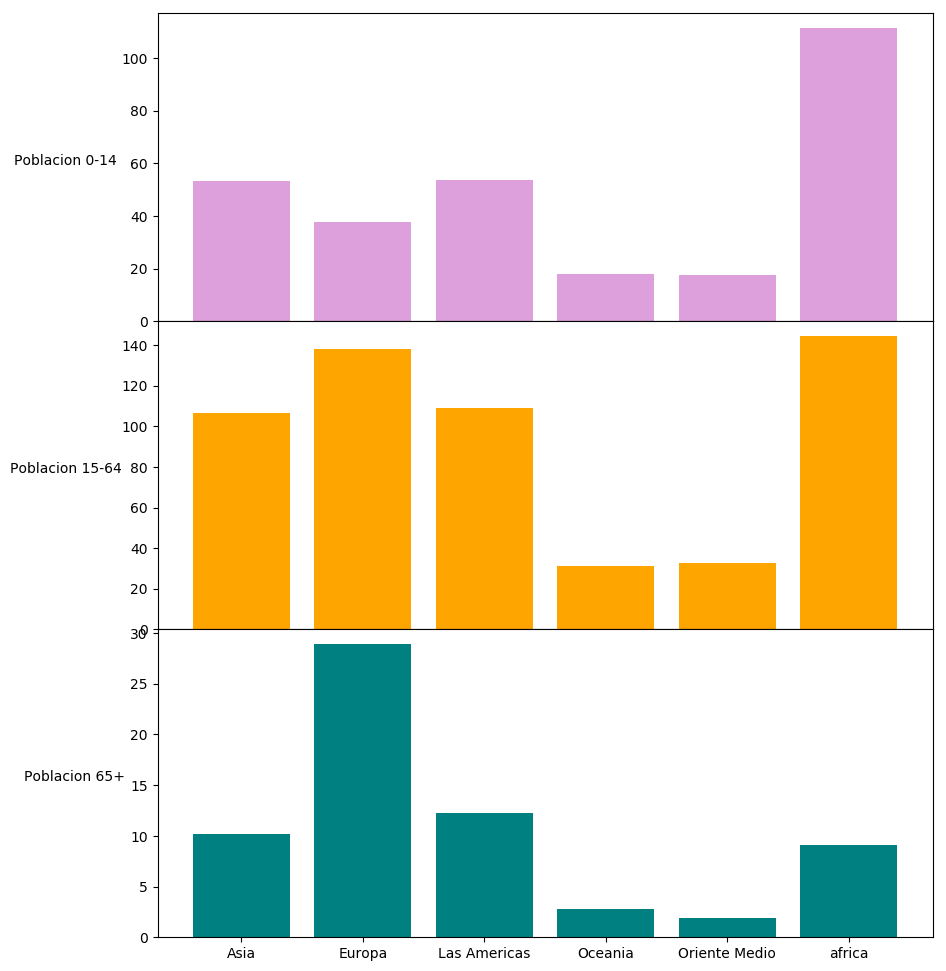

In [153]:
plt.style.use('default')
fig, axs = plt.subplots(3, 1,  sharex='col', figsize=(10, 12));
plt.subplots_adjust(wspace = 0.5, hspace=0)
color=('plum','orange', 'teal')
for index, colname in enumerate(data.columns):
    axs[index].bar(list(data.index), data[colname], color=color[index])
    axs[index].set_ylabel(colname, rotation= 0, labelpad= 40)


# Problema 4

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

<img src="images/prom-gastos-salud-per-capita-ano.png" width=400>

# Problema 5

Construya una gráfica similar a la siguiente usando el archivo `indicadores-mundiales.csv`. Promedio de gastos per capita por año.

<img src="images/prom-region-edades-ano.png" width=500>

# Ejemplos complementarios

In [30]:
plt.style.use('default')

### Tipos de líneas

In [154]:
x = np.linspace(0, 10, 1000)

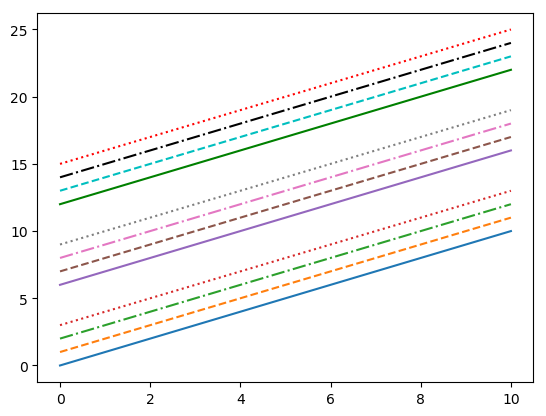

In [34]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 6, linestyle='-')  # solid
plt.plot(x, x + 7, linestyle='--') # dashed
plt.plot(x, x + 8, linestyle='-.') # dashdot
plt.plot(x, x + 9, linestyle=':');  # dotted

plt.plot(x, x + 12, '-g')  # solid green
plt.plot(x, x + 13, '--c') # dashed cyan
plt.plot(x, x + 14, '-.k') # dashdot black
plt.plot(x, x + 15, ':r');  # dotted red

### Manejo de ejes

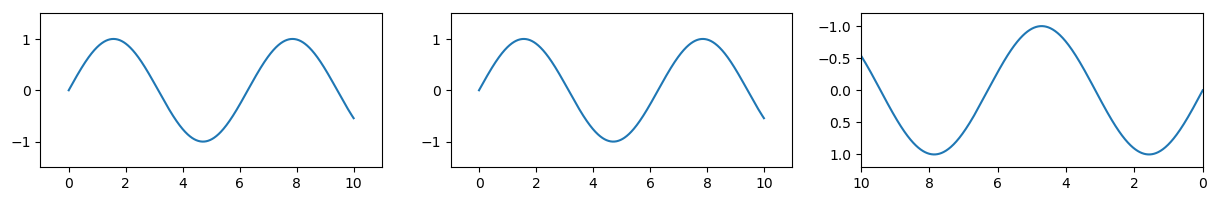

In [49]:
plt.figure(figsize=(15, 2))

plt.subplot(1, 3, 1)
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

plt.subplot(1, 3, 2)
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

plt.subplot(1, 3, 3)
plt.plot(x, np.sin(x))
plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

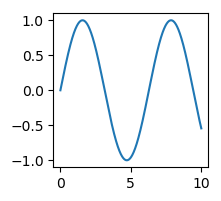

In [54]:
plt.figure(figsize=(2, 2))
plt.plot(x, np.sin(x))
plt.axis('tight');

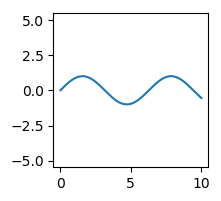

In [56]:
plt.figure(figsize=(2, 2))
plt.plot(x, np.sin(x))
plt.axis('equal');

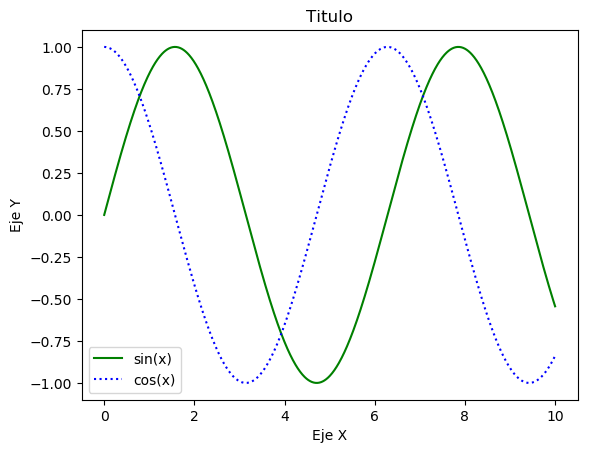

In [60]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.title("Titulo")
plt.xlabel("Eje X")
plt.ylabel("Eje Y");
plt.legend();

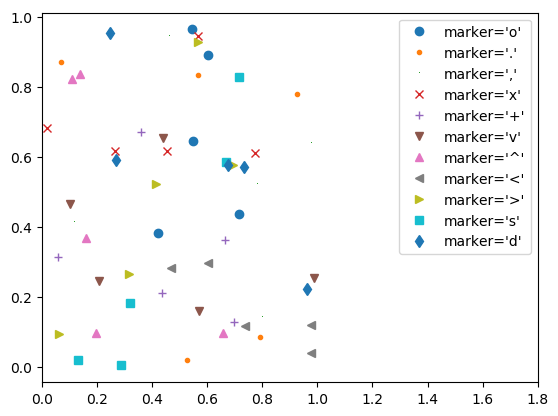

In [61]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

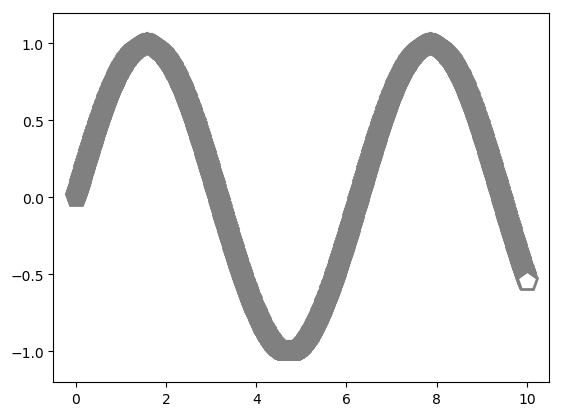

In [64]:
plt.plot(x, np.sin(x), '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

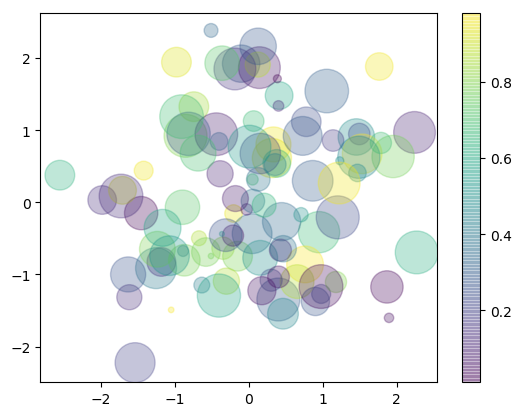

In [65]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

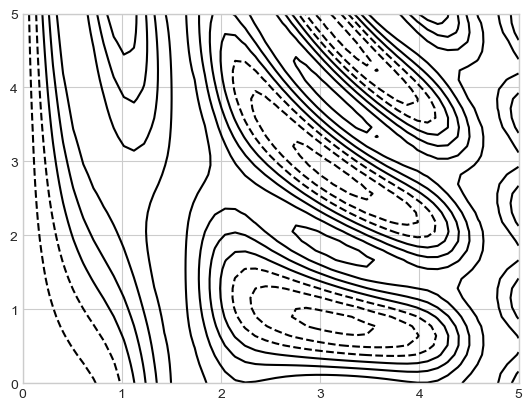

In [69]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, colors='black');

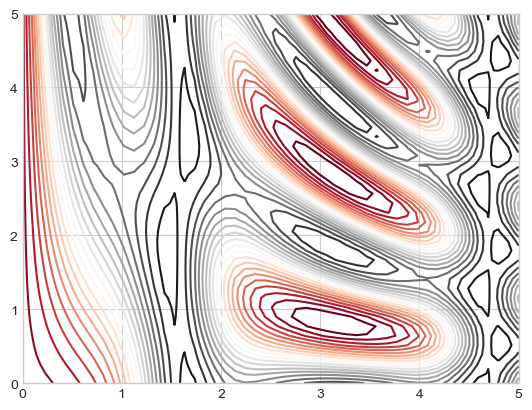

In [70]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

### Histogramas

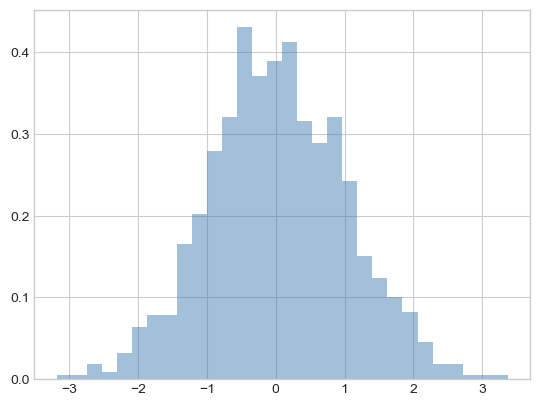

In [72]:
data = np.random.randn(1000)
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

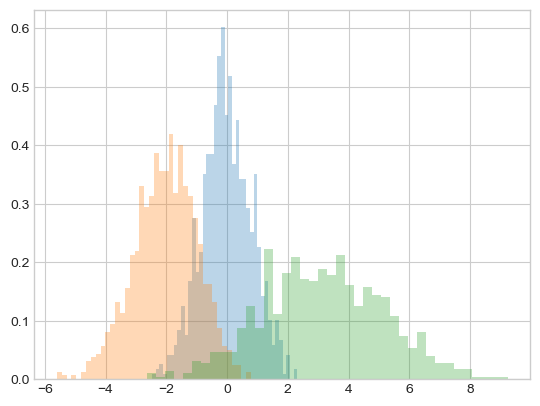

In [74]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

### Legendas

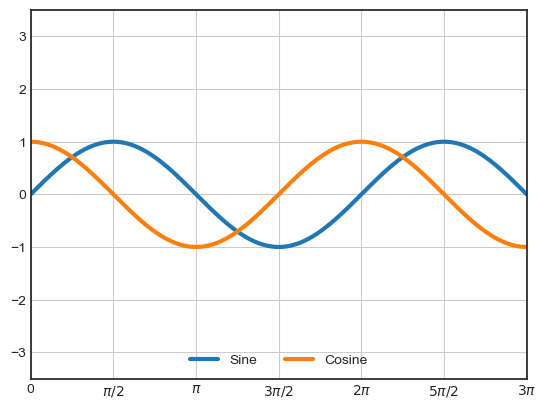

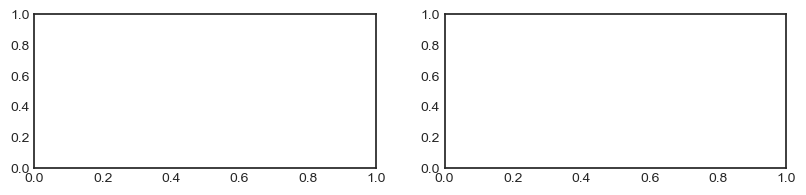

In [101]:
plt.figure(figsize=(15, 2))

plt.subplot(1, 3, 1)
ax.legend(loc='upper left', frameon=False)
fig

plt.subplot(1, 3, 2)
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

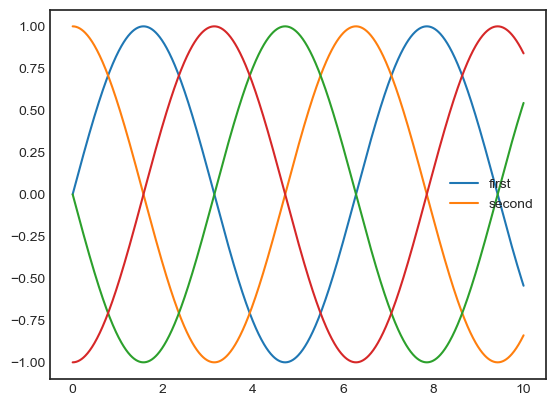

In [79]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

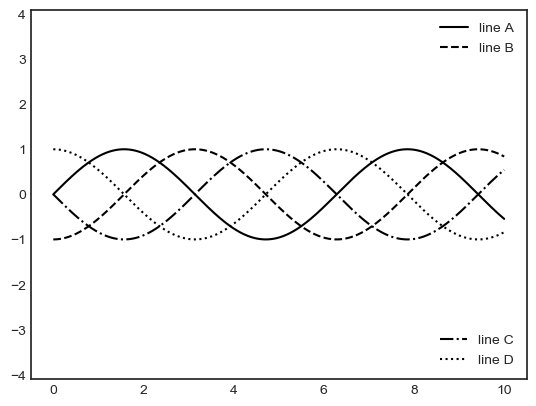

In [80]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

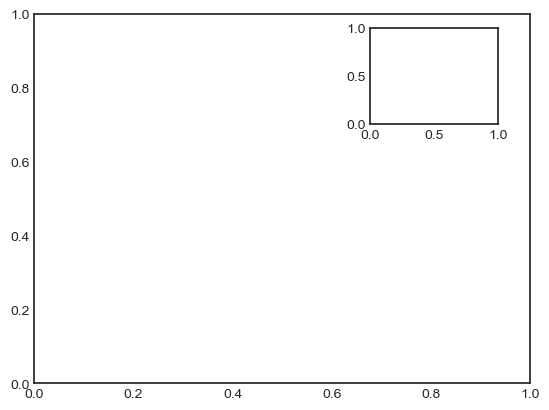

In [83]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

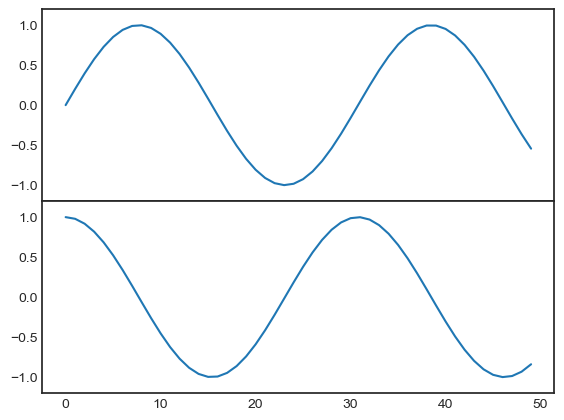

In [84]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

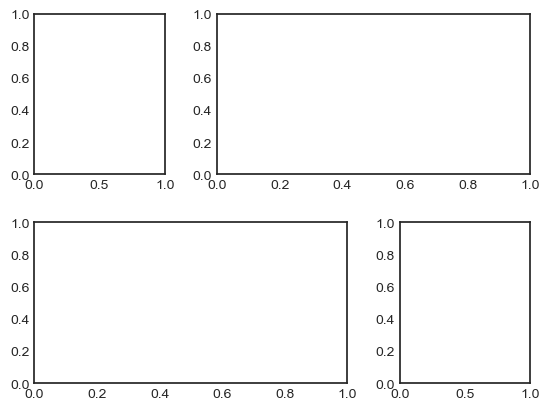

In [89]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

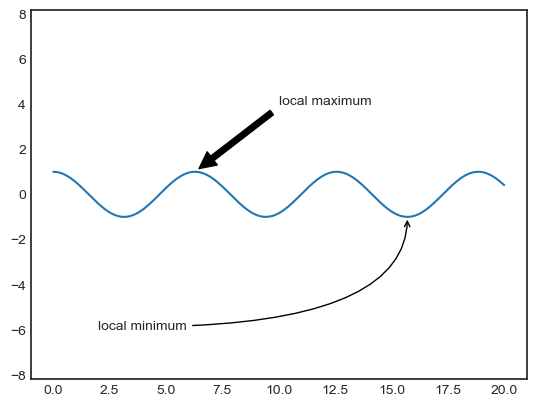

In [91]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

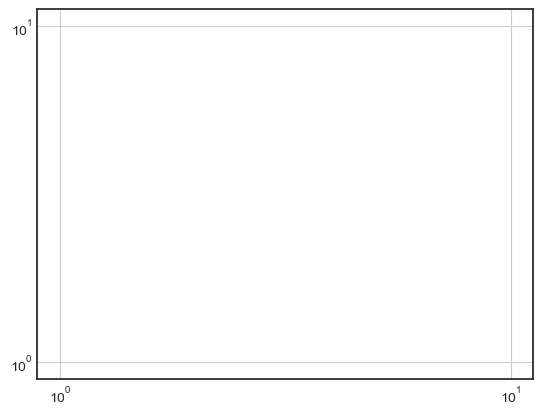

In [92]:
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

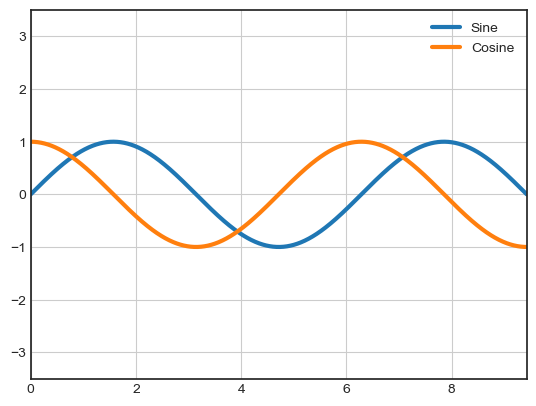

In [96]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

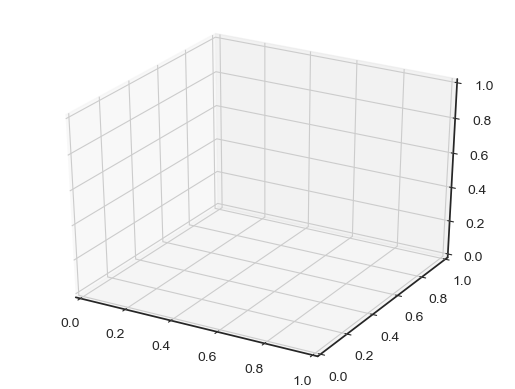

In [106]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

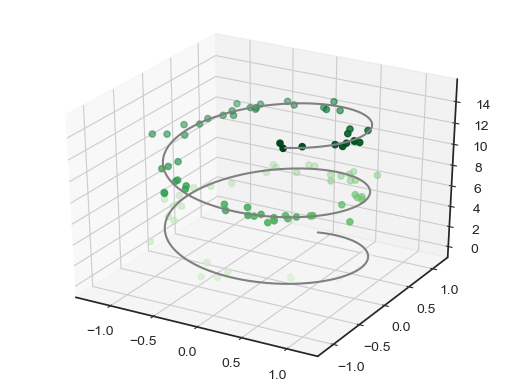

In [107]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [108]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

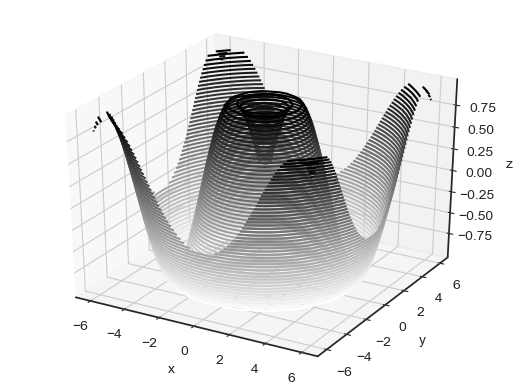

In [109]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

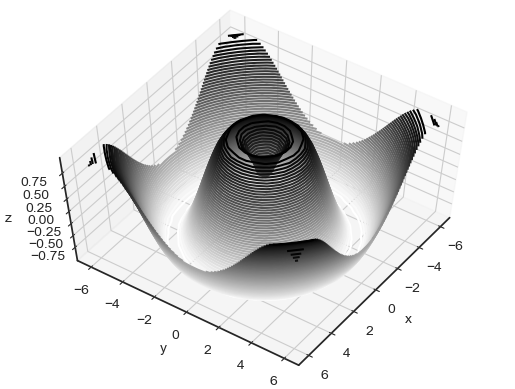

In [110]:
ax.view_init(60, 35)
fig

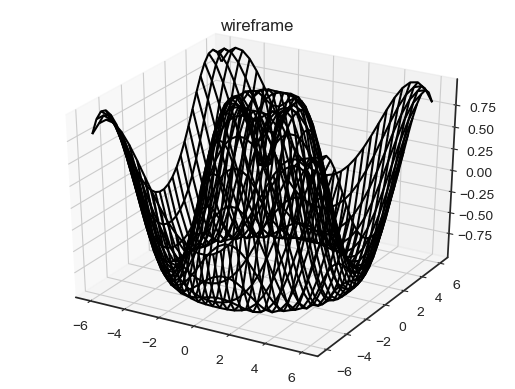

In [111]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

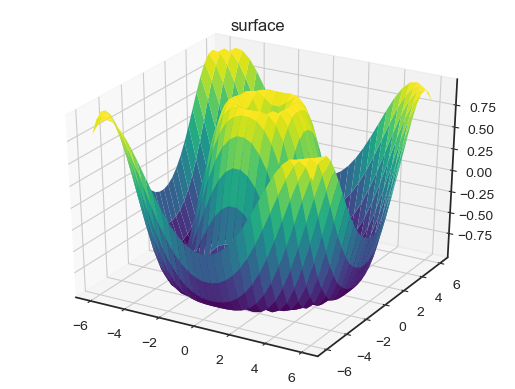

In [112]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

---

**Bibliografía**.

> [Matplotlib](http://matplotlib.org) web site.   
[Matplotlib gallery](http://matplotlib.org/gallery.html) at matplotlib.org  
[ggplot](http://ggplot.yhathq.com/docs/stat_function.html)  


---

Visualización de Datos
===

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---

Haga click [aquí](https://github.com/jdvelasq/Python-for-descriptive-analytics/tree/master/) para acceder al repositorio online.

Haga click [aquí](http://nbviewer.jupyter.org/github/jdvelasq/Python-for-descriptive-analytics/tree/master/) para explorar el repositorio usando `nbviewer`. 